# Introduction to Data Science
## Homework 3

Student Name: Kavitha Vishwanathan

Student Netid: kv668
***

### Part 1
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy, and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below.  

<img src = "Assignment.jpg">

### Part 2
1\. Label each case as describing either data mining `(DM)`, or the use of the results of data mining `(USE)`.  [Replace `(ANS)` below.]

a) `(USE)` Choose customers who are most likely to respond to an on-line ad.

b) `(DM)` Discover rules that indicate when an account has been defrauded.

c) `(DM)` Find patterns indicating what customer behavior is more likely to lead to response to an on-line ad.

d) `(DM)` Estimate probability of default for a credit application.

e) `(USE)` Predict whether a customer is pregnant

2\. Plumbing Inc. has been selling plumbing supplies for the last 20 years. The owner, Joe, decides that next year it is finally time to diversify by adding gardening tools to his products. Having had success using customer data to build predictive models to guide direct mail campaigns for special plumbing offers, he considers that data mining could help him to identify a subset of customers who should be good prospects for his new set of products. Is Joe ready to solve this as a supervised learning problem? What would you suggest as the target variable?  Be precise. Is there anything else that you would recommend that Joe do to achieve his business goal?

**Answer**: No, Joe is not yet ready to solve this as supervised learning.
First, he should build data to find out some customers who purchases the gardening tools. I would recommend him to sell the gardeining tools for few months, at the same time building the data of who buys gardening tools. After a good amount of data is collected, he can perform supervised learning on the data collected to find the characterstics of the customers who are likely to buy the gardeining tools. Here the target variable can be either binary classification such as 'will the customer buy the gardening tools?' or it can probability estimation such as 'what is the propability of the customer buying the gardening tools?'. I would suggest the owner to do probability estimation and find the customers based on that.


### Part 3
This is a hands-on task where we build a tree-structured predictive model as discussed in class and in the book. For this part, we will be using the data in `data/cell2cell_data_80_percent.csv`.

These historical data consist of 31,892 customers: 15,855 customers that churned (i.e., left the company) and 16,036 that did not churn (see the `"churndep"` variable). Here are the data set's 11 attributes describing the customers: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the target variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

**`VVV` VERY IMPORTANT NOTE `VVV`**

**Don't forget to exclude the target variable `"churndep"` when fitting your models. You don't want to include the target when fitting!!!**

1\. Load the data into a pandas `DataFrame()`.

In [2]:
import pandas as pd
customers = pd.read_csv("data/cell2cell_data_80_percent.csv")
X = customers[customers.columns[:11]]
Y = customers["churndep"]
data = None

2\. Using the following two functions for Entropy and Information Gain (don't forget to run this cell!), figure out what is the maximum information gain for each feature. Make a bar plot with feature names along the x-axis and maximum information gain on the y-axis. Which one is the largest? Don't forget some of the features are binary.

In [3]:
import numpy as np
import math

def entropy(target):
    # Get the number of users
    n = len(target)
    # Count how frequently each unique value occurs
    counts = np.bincount(target).astype(float)
    # Initialize entropy
    entropy = 0
    # If the split is perfect, return 0
    if len(counts) <= 1 or 0 in counts:
        return entropy
    # Otherwise, for each possible value, update entropy
    for count in counts:
        entropy += math.log(count/n, len(counts)) * count/n
    # Return entropy
    return -1 * entropy

def information_gain(feature, threshold, target):
    '''
    This function takes three things:
    feature - A list of all the possible values this feature has, e.g. data['revenue']
    threshold - A number to threshold a continuous variable on, e.g. 1.2
    target - A list of all the target values in the same order as feature, e.g. data['churndep']
    '''
    # Dealing with numpy arrays makes this slightly easier
    target = np.array(target)
    feature = np.array(feature)
    # Record if the feature vector is above the threshold
    feature = (feature <= threshold)
    # Initialize information gain with the parent entropy
    ig = entropy(target)
    # For both sides of the threshold, update information gain
    for level, count in zip([0, 1], np.bincount(feature).astype(float)):
        ig -= count/len(feature) * entropy(target[feature == level])
    # Return information gain
    return ig


       Field    Max_IG
0    revenue  0.000148
1   outcalls  0.000749
2    incalls  0.002770
3     months  0.000034
4    eqpdays  0.002214
5     webcap  0.000000
6   marryyes  0.000060
7     travel  0.000042
8      pcown  0.000037
9   creditcd  0.000253
10  retcalls  0.000000


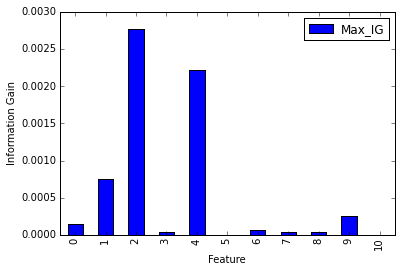

In [3]:
#function to find the best threshold
def best_threshold(field):
    maximum_ig = 0
    maximum_threshold = 0
    
    for threshold in X[field]:
        ig = information_gain(X[field], threshold, np.array(Y))

        if ig > maximum_ig:
            maximum_ig = ig
            maximum_threshold = threshold
        
        #return maximum_ig, maximum_threshold
        return field, maximum_ig

#to retrieve the max_ig for all features    
count=0
Field = []
Max_IG = []
for fields in X:
    P,Q = best_threshold(fields)
    Field.append(P)
    Max_IG.append(Q)
    count = count + 1

combine = zip(Field, Max_IG)

#load the data into pandas dataframe
df = pd.DataFrame(combine,columns = ["Field","Max_IG"])
print df

#create a barplot
import matplotlib.pyplot as plt
%matplotlib inline
barplot = df.plot(kind='bar')
plt.ylabel('Information Gain')
plt.xlabel('Feature')


3\. Now build and fit a tree-structured model using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) using the 11 attributes to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use the default options (this means you don't have to set anything).

**Remember, don't forget to exclude the target variable `"churndep"` when fitting your models. You don't want to fit on the target!!!**

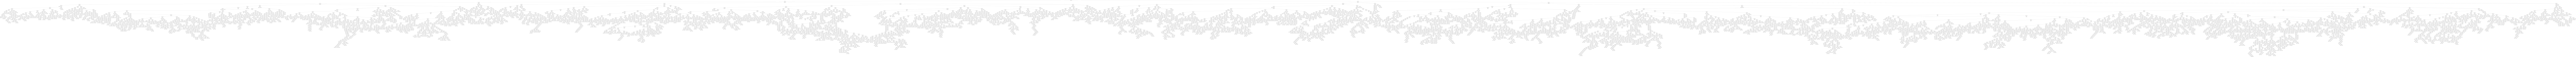

In [4]:
#!mv /home/ubuntu/ipynb/Hands-on/Class_2/images /home/ubuntu/ipynb/Homework/Homework_3

import os
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from IPython.display import Image

def Decision_Tree_Image(decision_tree, feature_names, name="temp"):
    # Export our decision tree to graphviz format
    dot_file = tree.export_graphviz(decision_tree.tree_, out_file='images/' + name + '.dot', feature_names=feature_names)
    
    # Call graphviz to make an image file from our decision tree
    os.system("dot -T png images/" + name + ".dot -o images/" + name + ".png")
    
    # Return the .png image so we can see it
    return Image(filename='images/' + name + '.png')

decision_tree = DecisionTreeClassifier(criterion="entropy")
decision_tree.fit(X, Y)
Decision_Tree_Image(decision_tree, X.columns)

4\. Load in another data set `data/cell2cell_data_20_percent.csv`. This data is of the same format as the other file we read in. Using the classifier built and fit in 3.3, predict `"churndep"` on the original data and the new data that you just loaded in. How well does it predict? (I.e., what is the accuracy on both data sets?)

In [5]:
import pandas as pd
from sklearn import metrics

import pandas as pd
newCustomers = pd.read_csv("data/cell2cell_data_20_percent.csv")
Xnew = newCustomers[newCustomers.columns[:11]]
Ynew = newCustomers["churndep"]

tree_original_accuracy = metrics.accuracy_score(decision_tree.predict(X), Y)
tree_new_accuracy = metrics.accuracy_score(decision_tree.predict(Xnew), Ynew)

# This lines will be used for grading. DO NOT REMOVE IT. Make sure it prints out the correct value!!!
print "Original and new tree accuracy = %.4f and %.4f" % (tree_original_accuracy, tree_new_accuracy)

Original and new tree accuracy = 0.9998 and 0.5325


### Part 4
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `max_depth`, `min_samples_split`, and `min_samples_leaf`:

1\. Generate a range of 10 values of each that make sense to test

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split

# Split the data into train and test pieces for both X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80)


# Model
depths = range(1, 100)
max_depth_values = []
min_samples_split_values = []
min_samples_leaf_values = []

for md in depths:
    model = DecisionTreeClassifier(max_depth=md)
    model.fit(X_train, Y_train)

    accuracy_train = metrics.accuracy_score(model.predict(X_train), Y_train)
    accuracy_test = metrics.accuracy_score(model.predict(X_test), Y_test)
    
    if accuracy_train - accuracy_test < 0.06:
        max_depth_values.append(md)

        
for md in depths:
    model = DecisionTreeClassifier(min_samples_split= md)
    model.fit(X_train, Y_train)

    accuracy_train = metrics.accuracy_score(model.predict(X_train), Y_train)
    accuracy_test = metrics.accuracy_score(model.predict(X_test), Y_test)
    
    if accuracy_train - accuracy_test < 0.13:
        min_samples_split_values.append(md)
        
for md in depths:
    model = DecisionTreeClassifier(min_samples_leaf= md)
    model.fit(X_train, Y_train)

    accuracy_train = metrics.accuracy_score(model.predict(X_train), Y_train)
    accuracy_test = metrics.accuracy_score(model.predict(X_test), Y_test)
    
    if accuracy_train - accuracy_test < 0.05:
        min_samples_leaf_values.append(md)

print max_depth_values
print min_samples_split_values[:11]
print min_samples_leaf_values [:11]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
[66, 67, 69, 70, 83, 84, 85, 86, 87, 88, 89]


2\. For the values of `max_depth`, `min_samples_split`, and `min_samples_leaf` you chose in 4.1 build a new decision tree classifier (on the original data we read in, the variable `data`) and record the classifier's accuracy on both the original data (the variable `data`) and the new data we read in (the variable `data_new`). You should now generate three plots, each with 10 points for the original data and 10 points for the new data. The values you chose are on the x-axis, the accuracies you calculated are on the y-axis, and there will be two lines/curves per plot (one for `data` and the other for `data_new`).

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

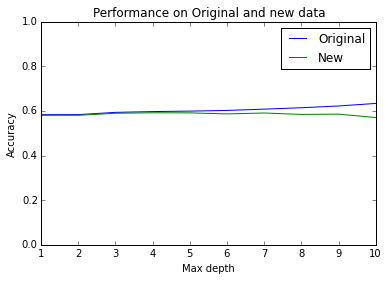

In [45]:
accuracies_data = []
accuracies_newdata = []

for value in max_depth_values:
    model = DecisionTreeClassifier(max_depth=value)
    model.fit(X, Y)
    
    accuracies_data.append(metrics.accuracy_score(model.predict(X), Y))
    accuracies_newdata.append(metrics.accuracy_score(model.predict(Xnew), Ynew))

plt.plot(max_depth_values, accuracies_data, label="Original")
plt.plot(max_depth_values, accuracies_newdata, label="New")
plt.title("Performance on Original and new data")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.ylim([0.0, 1.0])
plt.xlim([1,10])
plt.legend()
plt.show()

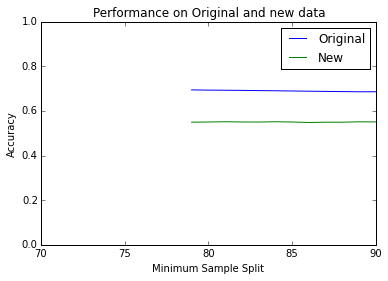

In [47]:
accuracies_data = []
accuracies_newdata = []

for value in min_samples_split_values:
    model = DecisionTreeClassifier(min_samples_split=value)
    model.fit(X, Y)
    
    accuracies_data.append(metrics.accuracy_score(model.predict(X), Y))
    accuracies_newdata.append(metrics.accuracy_score(model.predict(Xnew), Ynew))

plt.plot(min_samples_split_values, accuracies_data, label="Original")
plt.plot(min_samples_split_values, accuracies_newdata, label="New")
plt.title("Performance on Original and new data")
plt.xlabel("Minimum Sample Split")
plt.ylabel("Accuracy")
plt.ylim([0.0, 1.0])
plt.xlim([70,90])
plt.legend()
plt.show()

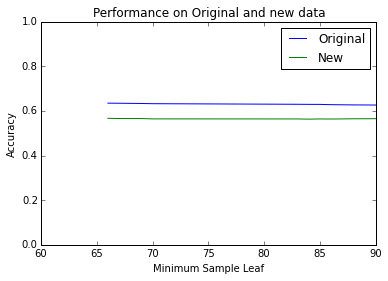

In [48]:
accuracies_data = []
accuracies_newdata = []

for value in min_samples_leaf_values:
    model = DecisionTreeClassifier(min_samples_leaf=value)
    model.fit(X, Y)
    
    accuracies_data.append(metrics.accuracy_score(model.predict(X), Y))
    accuracies_newdata.append(metrics.accuracy_score(model.predict(Xnew), Ynew))

plt.plot(min_samples_leaf_values, accuracies_data, label="Original")
plt.plot(min_samples_leaf_values, accuracies_newdata, label="New")
plt.title("Performance on Original and new data")
plt.xlabel("Minimum Sample Leaf")
plt.ylabel("Accuracy")
plt.ylim([0.0, 1.0])
plt.xlim([60,90])
plt.legend()
plt.show()

3\. Now that you have read Chapter 4 of your textbook, let's try fitting some linear models: a logistic regression (`sklearn.linear_model.LogisticRegression()`, [manual](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)) and SVM (`sklearn.svm.LinearSVC()`, [manual](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)). For each of these models, fit them on the first set of data we read in (the variable `data`) and report the accuracy on both sets of data we read in (`data` and `data_new`). When fitting each model, you should keep all parameters as their defaults.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#logistic Model
model = LogisticRegression()
model.fit(X, Y)
logistic_regression_original_accuracy = metrics.accuracy_score(model.predict(X), Y)
logistic_regression_new_accuracy = metrics.accuracy_score(model.predict(Xnew), Ynew)

#SVM Model
model = LinearSVC()
model.fit(X, Y)
svm_original_accuracy = metrics.accuracy_score(model.predict(X), Y)
svm_new_accuracy = metrics.accuracy_score(model.predict(Xnew), Ynew)

# # These lines will be used for grading. DO NOT REMOVE THEM. Make sure they print out the correct values!!!
print "Original and new logistic regression accuracy = %.4f and %.4f" % (logistic_regression_original_accuracy, logistic_regression_new_accuracy)
print "Original and new SVM accuracy = %.4f and %.4f" % (svm_original_accuracy, svm_new_accuracy)

Original and new logistic regression accuracy = 0.5618 and 0.5595
Original and new SVM accuracy = 0.4775 and 0.4754
